In [13]:
%matplotlib qt

In [14]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import numpy as np
from glob import glob
from scipy.ndimage.filters import gaussian_filter1d
from scipy import signal

In [15]:
!make -f stages/test/makefile
%time !./stages_test

g++ -c -DTEST -g -Wall -Werror -msse2 -Wno-unused-variable -O2 -I. stages/test/stages_test.cc -o build/stages_test/stages_test.o
g++ -g -o stages_test build/stages_test/stages_test.o build/stages_test/ramp_extractor.o build/stages_test/segment_generator.o build/stages_test/resources.o build/stages_test/units.o build/stages_test/random.o  -lm -lprofiler -L/opt/local/lib
Rendering stepped LFO
CPU times: user 178 ms, sys: 69.6 ms, total: 247 ms
Wall time: 4.78 s


In [26]:
new = {}
stock = {}
for fn in glob("stages_*wav"):
    try:
        n = wavfile.read(fn)[1]
    except Exception as e:
        print(fn)
        print(e)
        continue
    new[fn[:-4]] = n
    try:
        s = wavfile.read(f"stages_test_reference/{fn}")[1]
        stock[fn[:-4]] = s
    except:
        print(f"stock file not found for {fn}; skipping")
        continue
    if (s==n).all():
        print(f"✅ {fn}")
    else:
        print(f"❌ {fn}")
        for i, label in enumerate(["gate", "value", "segment", "phase"]):
            if (s.T[i] == n.T[i]).all():
                print(f"\t✅ {label}")
            else:
                ixs = np.where(s.T[i] != n.T[i])[0]
                print(f"\t❌ {label}")
                plt.figure()
                plt.plot(s.T[i], label="old")
                plt.plot(n.T[i], label="new")
                plt.title(f"{fn} - {label}")
                plt.xlim(ixs[0], ixs[-1])
                #plt.legend()

✅ stages_timed_pulse.wav
✅ stages_single_decay.wav
stock file not found for stages_random_spline_lfo.wav; skipping
✅ stages_free_running_lfo.wav
stock file not found for stages_random_white_noise.wav; skipping
✅ stages_portamento.wav
stock file not found for stages_tap_lfo_audio_rate.wav; skipping
✅ stages_two_step.wav
stock file not found for stages_random_sine_lfo.wav; skipping
stock file not found for stages_random_tap_lfo.wav; skipping
✅ stages_tap_lfo.wav
stock file not found for stages_random_brownian_lfo.wav; skipping
stock file not found for stages_random_stepped_lfo.wav; skipping
✅ stages_delay.wav
✅ stages_sh.wav
✅ stages_gate.wav
✅ stages_adsr.wav
stock file not found for stages_random_brown_noise.wav; skipping


In [12]:
rand_tap = new["stages_random_tap_lfo"].T
((np.diff(rand_tap[0]) > 0) == (np.diff(rand_tap[1]) != 0)).all()


True

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
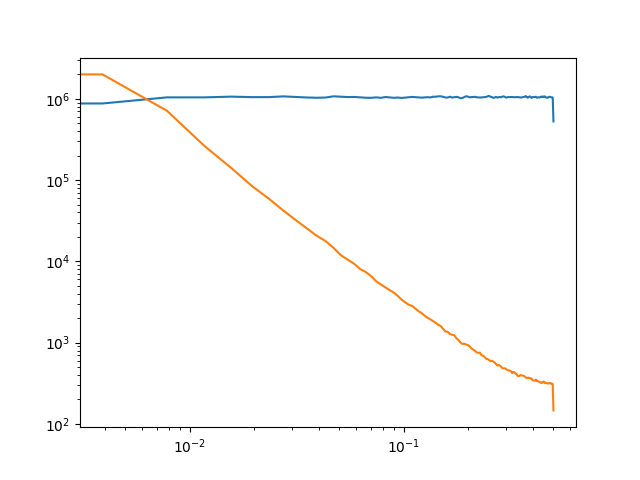

In [47]:
plt.figure()
plt.loglog(*signal.welch(new["stages_random_white_noise"].T[1], scaling="spectrum"))
plt.loglog(*signal.welch(new["stages_random_brown_noise"].T[1], scaling="spectrum"))

In [158]:
phase = new["stages_tap_lfo_audio_rate"].T[3]
gate = new["stages_tap_lfo_audio_rate"].T[0]

In [159]:
phase_peaks = signal.find_peaks(phase)[0]
gate_peaks = signal.find_peaks(gate)[0]


In [160]:
32000 / np.diff(phase_peaks).mean(), 32000 / np.diff(gate_peaks).mean()

(1031.194960297181, 1031.1950632948974)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
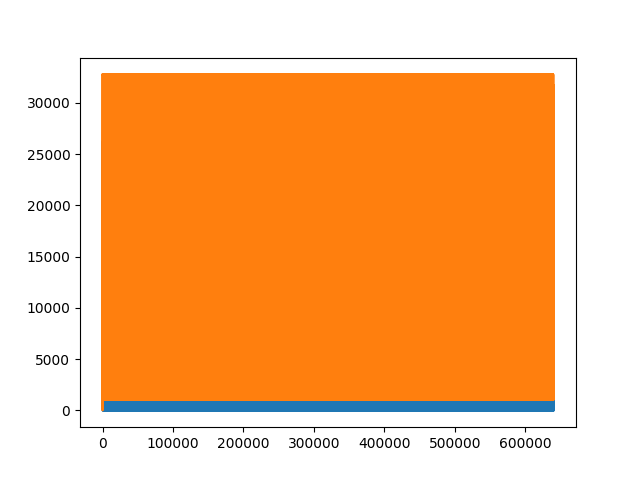

In [162]:
plt.figure()
plt.plot(gate)
plt.plot(phase)
